In [1]:
# Let's load the provided dataset and inspect its structure, size, and basic statistics.
import pandas as pd

# Load the dataset
file_path = 'data2024b.csv'
data = pd.read_csv(file_path)

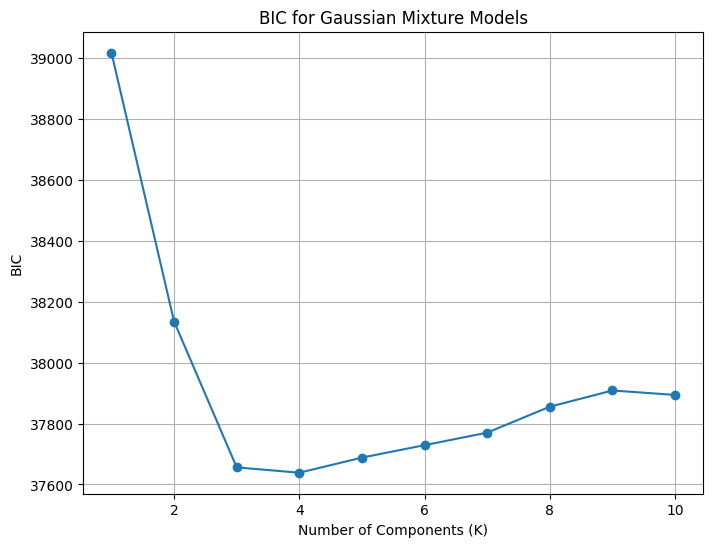

Optimal number of components (GMM): 4


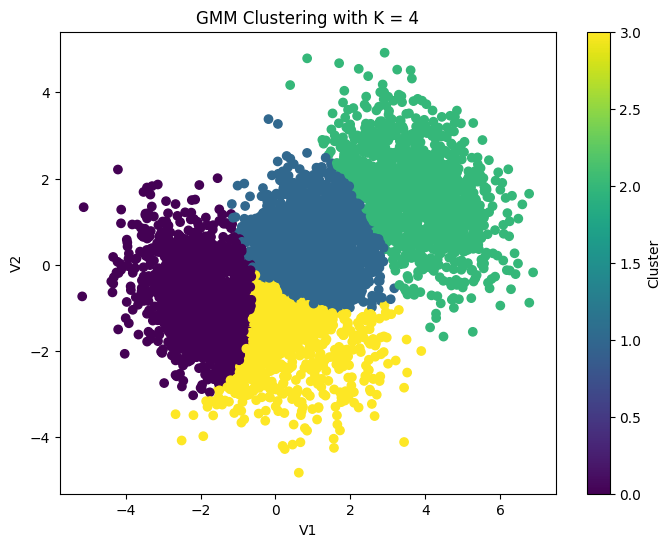

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Extract the data (V1 and V2 columns) as a NumPy array
X = data[['V1', 'V2']].values

# Define a range of K values
K_values = range(1, 11)
bics = []

# Fit GMM for each K and compute BIC
for K in K_values:
    gmm = GaussianMixture(n_components=K, random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))

# Plot the BIC values for each K
plt.figure(figsize=(8, 6))
plt.plot(K_values, bics, marker='o')
plt.xlabel('Number of Components (K)')
plt.ylabel('BIC')
plt.title('BIC for Gaussian Mixture Models')
plt.grid(True)
plt.show()

# Find the optimal K where BIC is minimized
optimal_K_gmm = K_values[np.argmin(bics)]
print(f"Optimal number of components (GMM): {optimal_K_gmm}")

# Fit GMM with the optimal number of components
gmm_optimal = GaussianMixture(n_components=optimal_K_gmm, random_state=42)
labels = gmm_optimal.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'GMM Clustering with K = {optimal_K_gmm}')
plt.colorbar(label='Cluster')
plt.show()


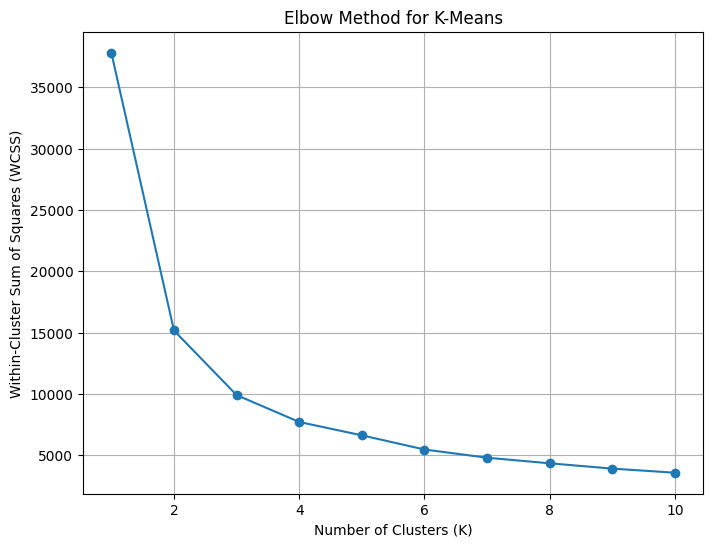

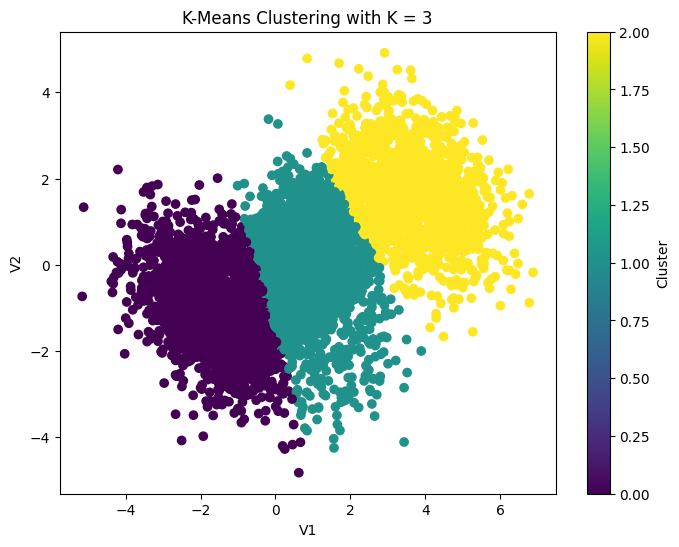

In [3]:
from sklearn.cluster import KMeans

# Define a range of K values
K_values = range(1, 11)
wcss = []

# Fit KMeans for each K and compute WCSS
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the WCSS values for each K
plt.figure(figsize=(8, 6))
plt.plot(K_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for K-Means')
plt.grid(True)
plt.show()

# Visually inspect the elbow to choose the optimal K
optimal_K_kmeans = 3  # Example: manually choose based on elbow

# Fit KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_K_kmeans, random_state=42)
labels = kmeans_optimal.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'K-Means Clustering with K = {optimal_K_kmeans}')
plt.colorbar(label='Cluster')
plt.show()


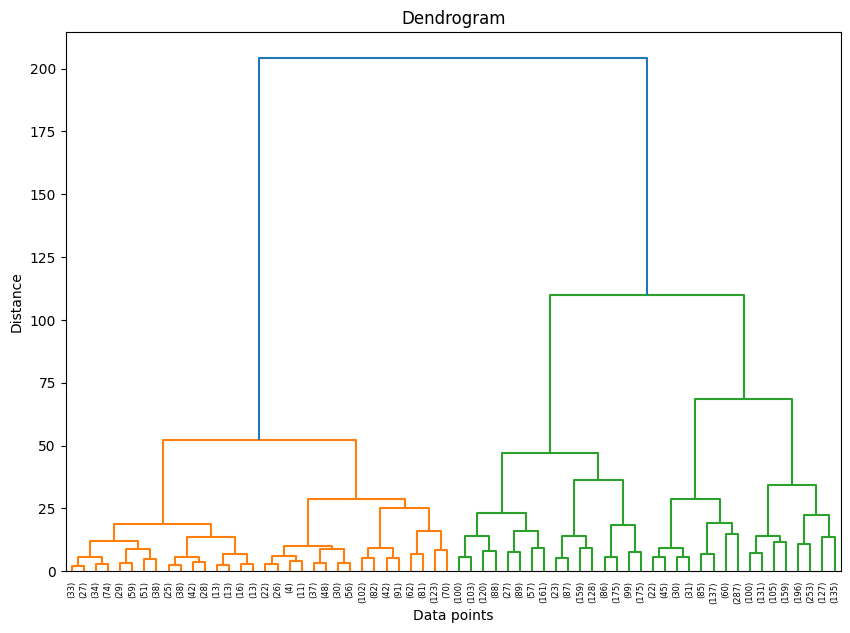

Optimal number of clusters (Hierarchical): 3


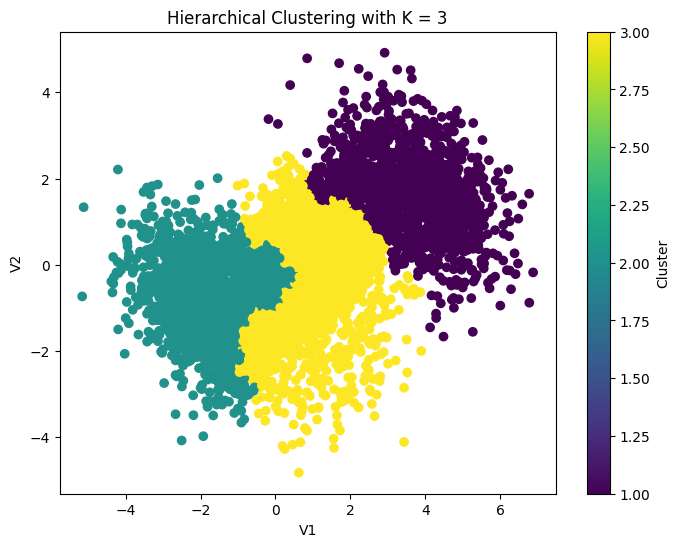

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Set a threshold for the dendrogram to determine the number of clusters
max_d = 80  # Change this based on visual inspection of the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Find the number of clusters
optimal_K_hierarchical = len(np.unique(clusters))
print(f"Optimal number of clusters (Hierarchical): {optimal_K_hierarchical}")

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'Hierarchical Clustering with K = {optimal_K_hierarchical}')
plt.colorbar(label='Cluster')
plt.show()
